In [1]:
#import Neccessory libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, GridSearchCV

#import required accuracy metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import KFold, cross_val_score

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Automobile Insurance Fraud Detection

## Problem Statement:
### Business case: Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.

### In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made.

### In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not.

In [2]:
#loading the data set
df = pd.read_csv(r"insurance_claims.csv")
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,1991-07-16,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,2014-01-05,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,2003-02-17,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,2011-11-18,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [3]:
#lets check for Null Values
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted            91
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [4]:
#check the data types
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [5]:
#Lets check which columns contains '?'
df[df.columns[(df == '?').any()]].nunique()

collision_type             4
property_damage            3
police_report_available    3
dtype: int64

In [6]:
#Lets chcek the value counts for categorical data
for i in df.columns:
    if df[i].dtypes == 'object':
        print(df[i].value_counts())
        print('-----------------------------------')

policy_bind_date
2006-01-01    3
1992-08-05    3
1992-04-28    3
2004-01-03    2
1995-12-07    2
             ..
1991-07-16    1
2014-01-05    1
2003-02-17    1
2011-11-18    1
2002-05-26    1
Name: count, Length: 951, dtype: int64
-----------------------------------
policy_state
OH    352
IL    338
IN    310
Name: count, dtype: int64
-----------------------------------
policy_csl
250/500     351
100/300     349
500/1000    300
Name: count, dtype: int64
-----------------------------------
insured_sex
FEMALE    537
MALE      463
Name: count, dtype: int64
-----------------------------------
insured_education_level
JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: count, dtype: int64
-----------------------------------
insured_occupation
machine-op-inspct    93
prof-specialty       85
tech-support         78
sales                76
exec-managerial      76
craft-repair         74
transport-moving     7

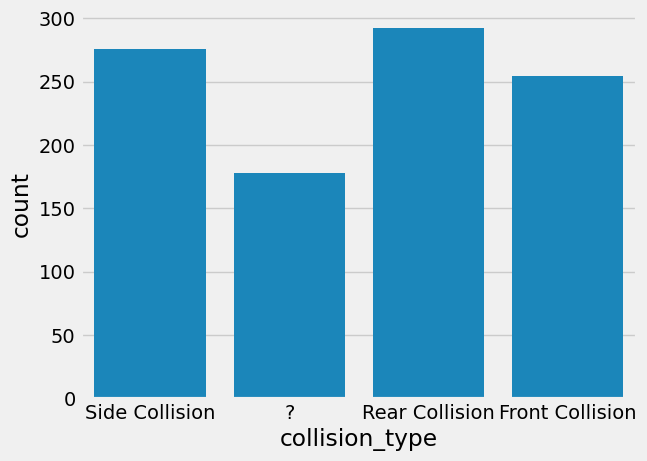

In [7]:
#lets check counts for collision_type
plt.style.use('fivethirtyeight')
sns.countplot(x = 'collision_type', data = df)
plt.show()

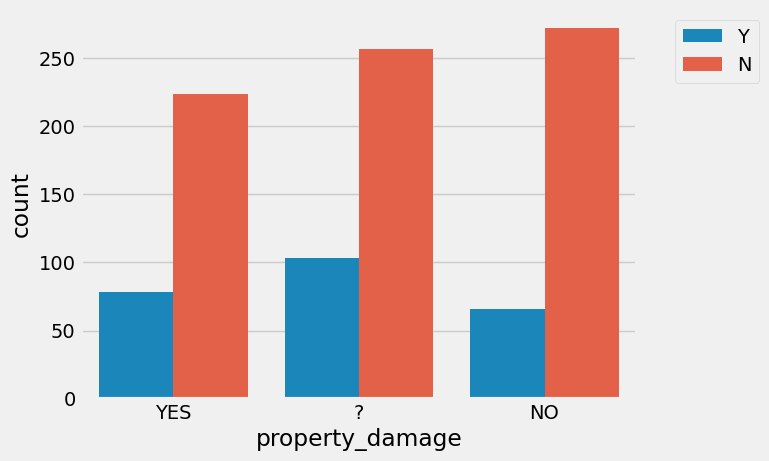

In [8]:
#lets check counts for property_damage
sns.countplot(x = 'property_damage',hue = 'fraud_reported', data = df)
plt.legend( bbox_to_anchor = (1.05, 1), loc = 'upper left')
plt.show()

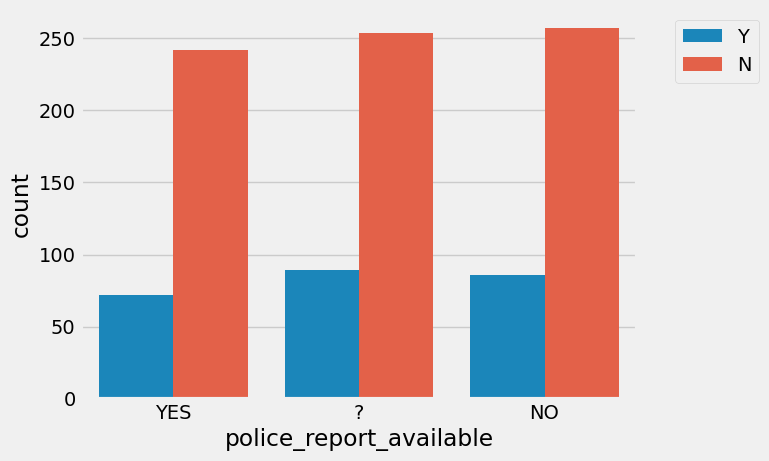

In [9]:
#lets check counts for police_report_available 
sns.countplot(x = 'police_report_available',hue = 'fraud_reported', data = df)
plt.legend( bbox_to_anchor = (1.05, 1), loc = 'upper left')
plt.show()

fraud_reported
N    753
Y    247
Name: count, dtype: int64


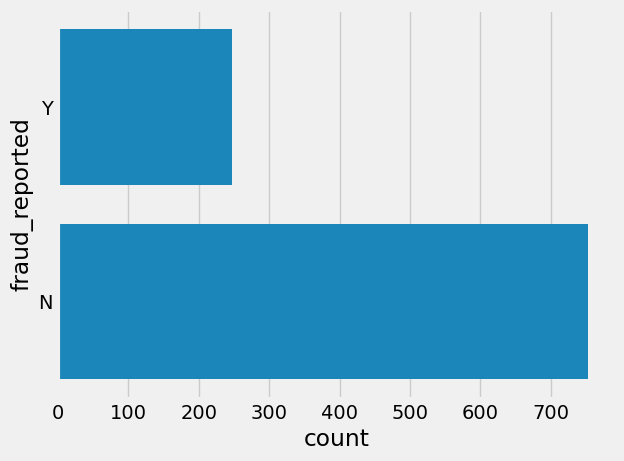

In [10]:
#lets have a look on our target variable
sns.countplot(df['fraud_reported'])
print(df['fraud_reported'].value_counts())
plt.show()

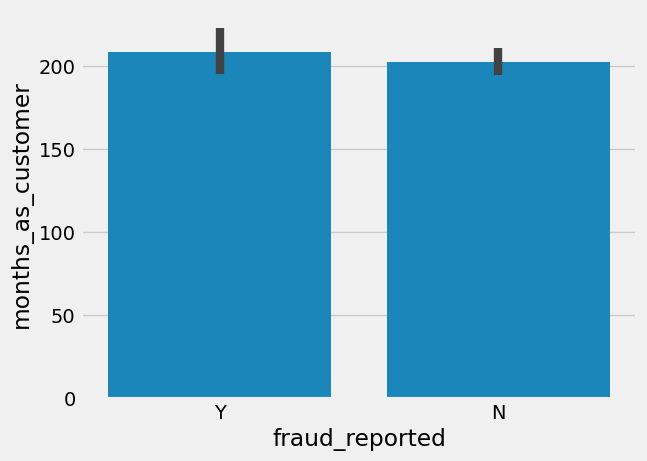

In [11]:
#Lets check how months_as_customer affects target varaible
plt.style.use('fivethirtyeight')
sns.barplot(x = "fraud_reported", y = "months_as_customer", data = df)
plt.show()

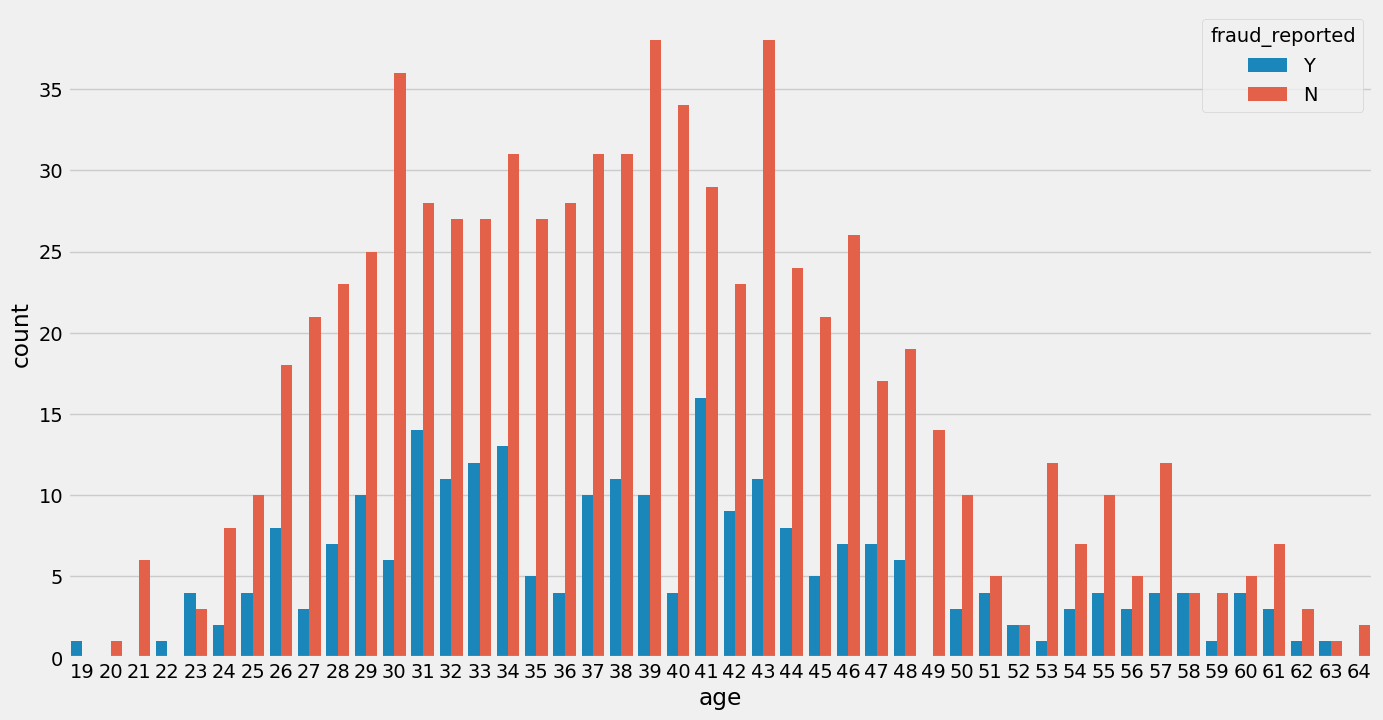

In [12]:
#lets check the fraud_report based on age
plt.figure(figsize = (15,8))
sns.countplot(x = 'age', hue = 'fraud_reported', data = df)
plt.show()

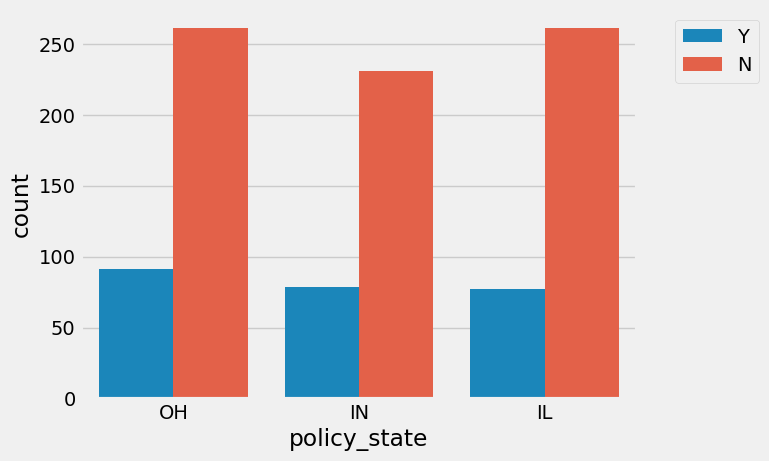

In [13]:
#lets check fraud_report based on policy_state 
sns.countplot(x = 'policy_state', hue = 'fraud_reported', data = df)
plt.legend( bbox_to_anchor = (1.05, 1), loc = 'upper left')
plt.show()

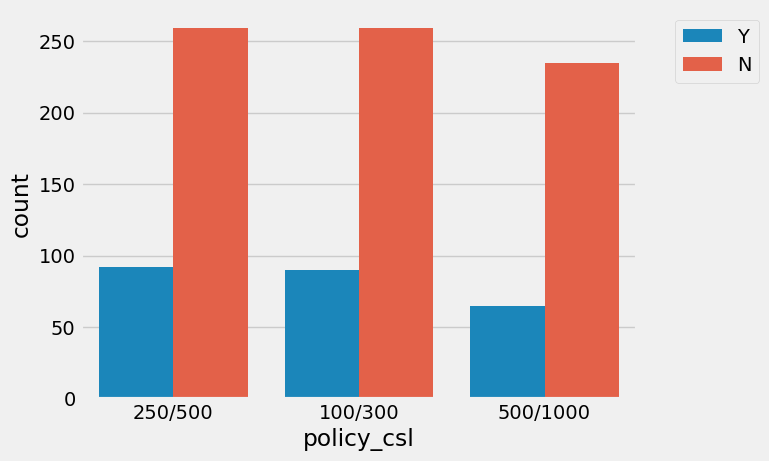

In [14]:
#lets check fraud_report based on policy_state 
sns.countplot(x = 'policy_csl', hue = 'fraud_reported', data = df)
plt.legend( bbox_to_anchor = (1.05, 1), loc = 'upper left')
plt.show()

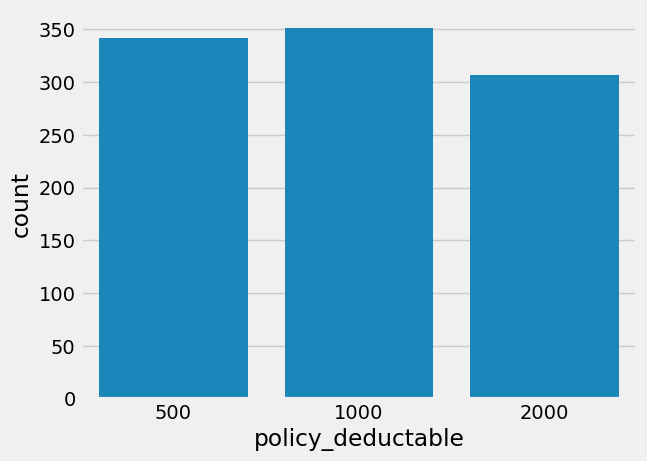

In [15]:
#lets check fraud_report based on policy_state 
sns.countplot(x='policy_deductable', data=df)
plt.show()

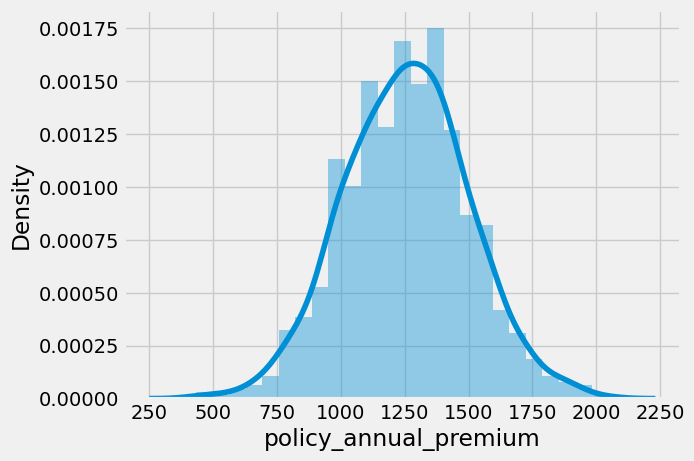

In [16]:
#lets have a look at destribution of policy_annual_premium
sns.distplot(df['policy_annual_premium'])
plt.show()

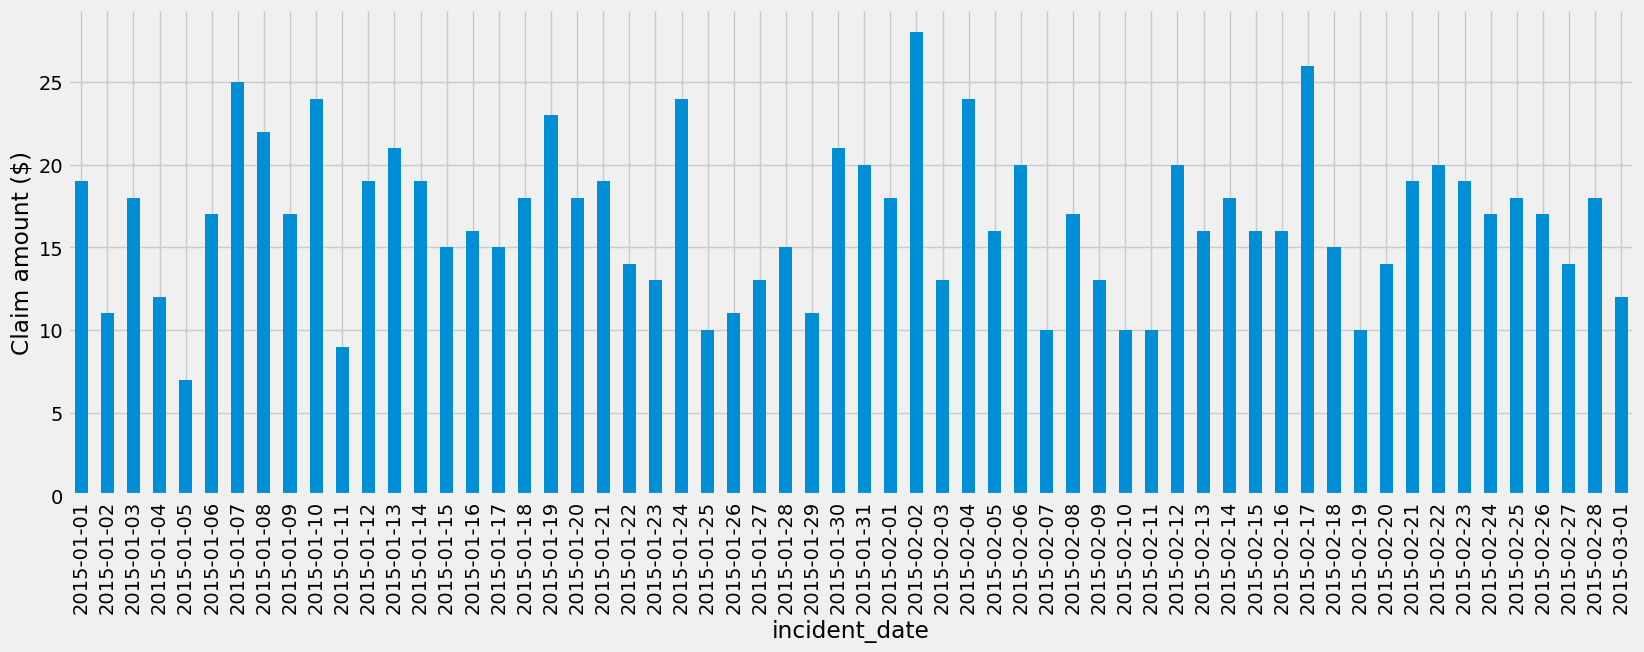

In [17]:
# plotting barplot for incident_date vs Claim amount ($)
fig = plt.figure(figsize=(18,6))
ax = df.groupby('incident_date').total_claim_amount.count().plot.bar(ylim=0)
ax.set_ylabel('Claim amount ($)')
plt.show()

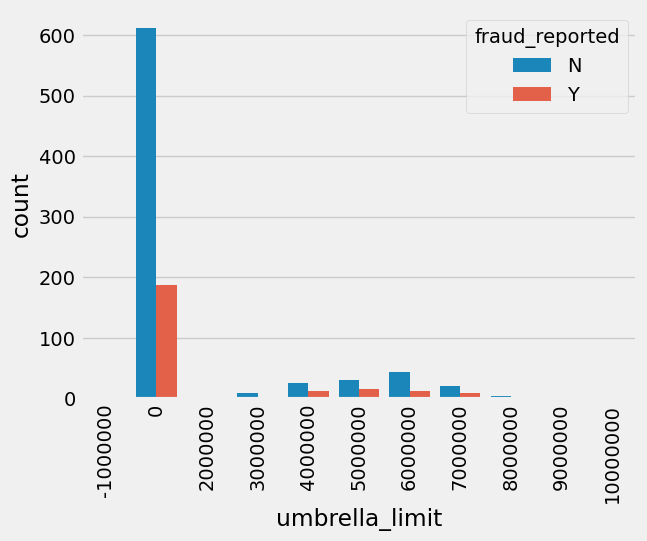

In [18]:
#lets see fraud_reported based on umbrella_limit
sns.countplot(x = 'umbrella_limit', hue = 'fraud_reported', data = df)
plt.xticks(rotation = 90)
plt.show()

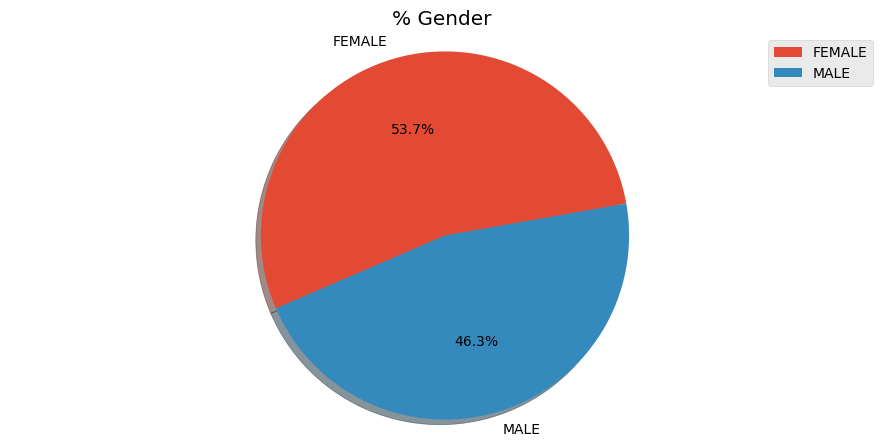

In [19]:
# Creating a pie chart for 'Marital status'
plt.style.use('ggplot')
gender = df['insured_sex'].value_counts()
plt.figure(figsize=(10, 5))
plt.pie(gender.values, labels = gender.index, startangle=10, shadow = True, autopct='%1.1f%%')
plt.title('% Gender ')
plt.legend()
plt.legend(prop={'size': 10})
plt.axis('equal')
plt.show()

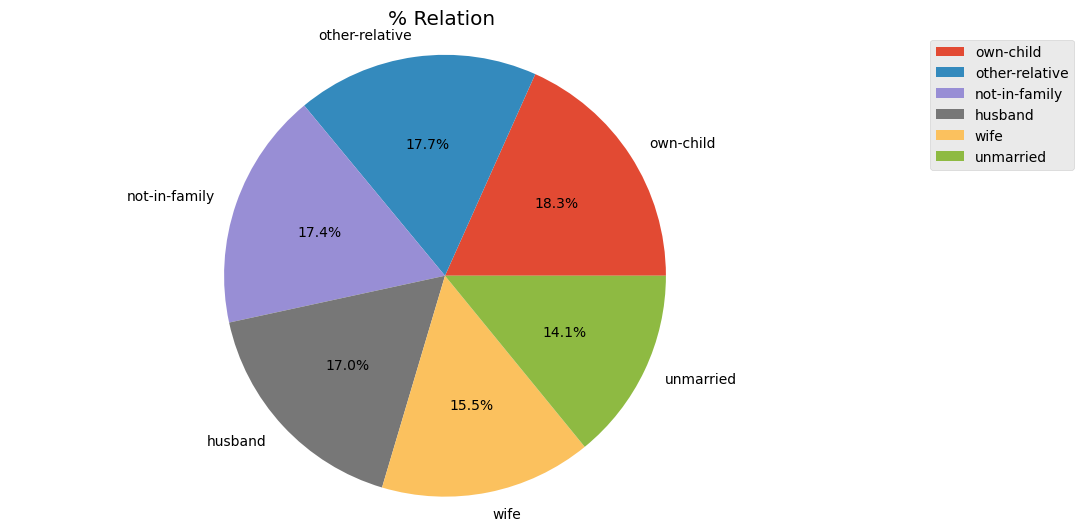

In [20]:
#Lets have a look on insured_relationship, how it is distributed
plt.figure(figsize=(10, 6))
plt.pie( df["insured_relationship"].value_counts().values, labels = df["insured_relationship"].value_counts().index, autopct='%1.1f%%')
fig = plt.gcf()
plt.title('% Relation ')
plt.axis('equal')
plt.legend(prop={'size': 12})
plt.legend( bbox_to_anchor = (1.05, 1), loc = 'upper left')
plt.show()

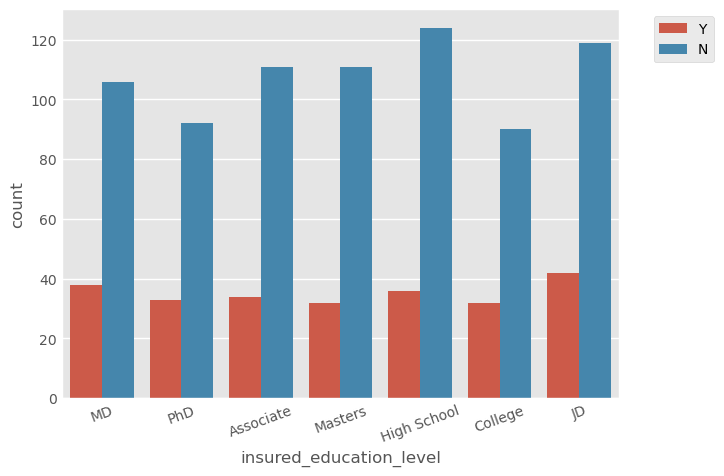

In [21]:
#lets check fraud_reported based on insured_education_level 
sns.countplot(x = 'insured_education_level', hue = 'fraud_reported', data = df)
plt.xticks(rotation = 20)
plt.legend( bbox_to_anchor = (1.05, 1), loc = 'upper left')
plt.show()

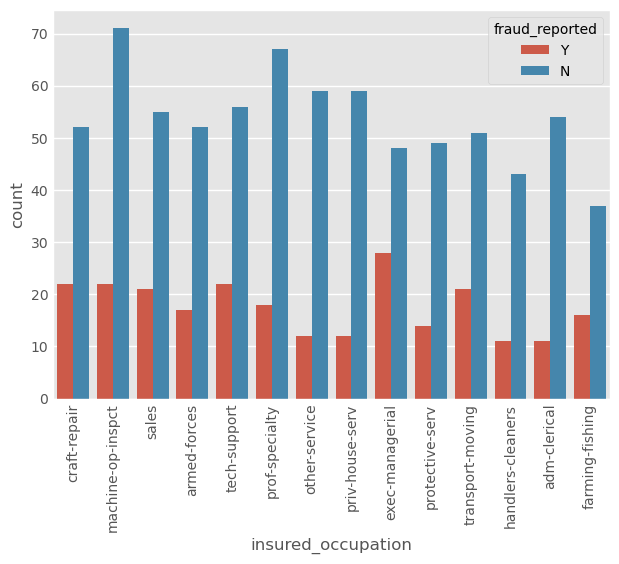

In [22]:
#lets check fraud_reported based on insured_occupation 
sns.countplot(x = 'insured_occupation', hue = 'fraud_reported', data = df)
plt.xticks(rotation = 90)
plt.show()

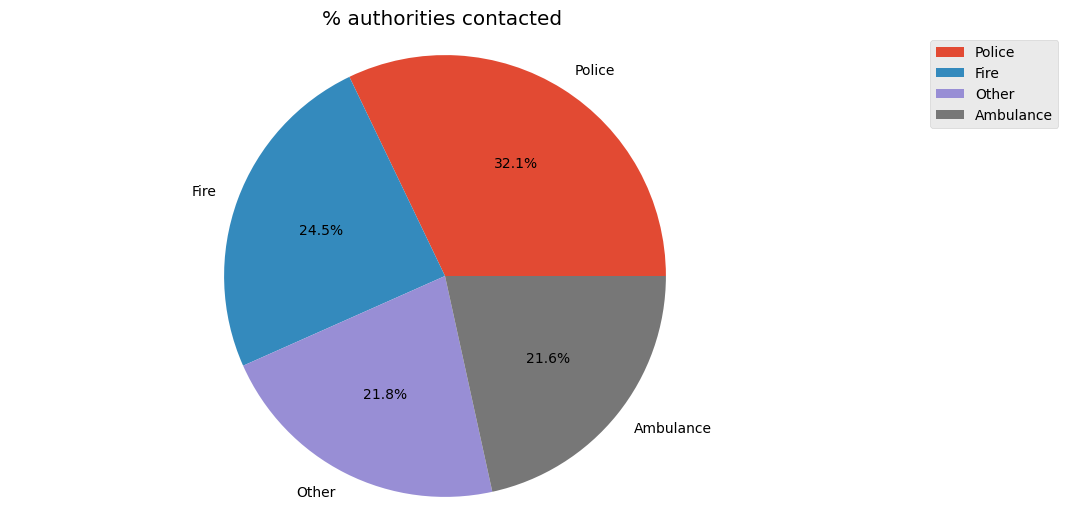

In [23]:
#Lets have a look on insured_relationship, how it is distributed
plt.figure(figsize=(10, 6))
plt.pie( df["authorities_contacted"].value_counts().values, labels = df["authorities_contacted"].value_counts().index, autopct='%1.1f%%')
fig = plt.gcf()
plt.title('% authorities contacted ')
plt.axis('equal')
plt.legend(prop={'size': 12})
plt.legend( bbox_to_anchor = (1.05, 1), loc = 'upper left')
plt.show()

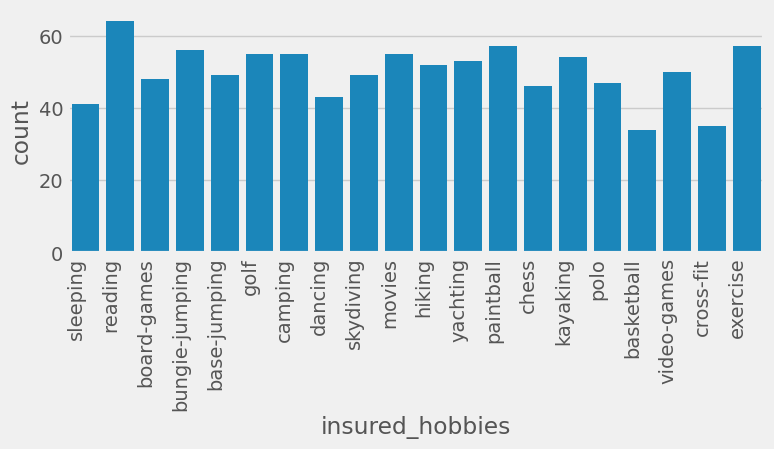

In [24]:
#lets plot countplot for hobbies
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(8,3))
ax = sns.countplot(x='insured_hobbies', data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.show()

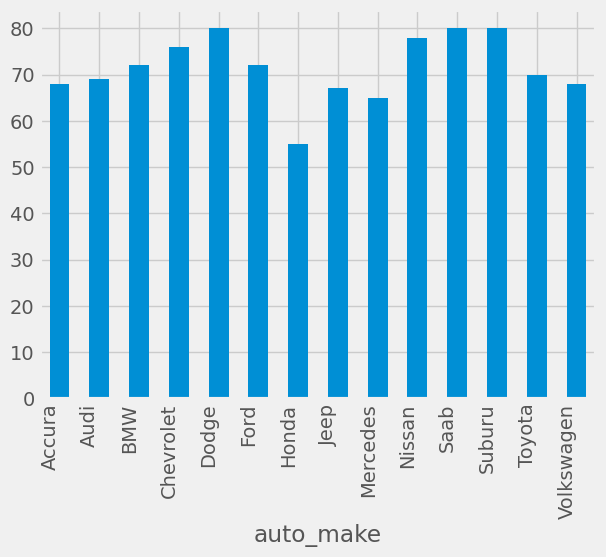

In [25]:
#lets plot countplot for auto_make column
ax = df.groupby('auto_make').vehicle_claim.count().plot.bar()
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.show()

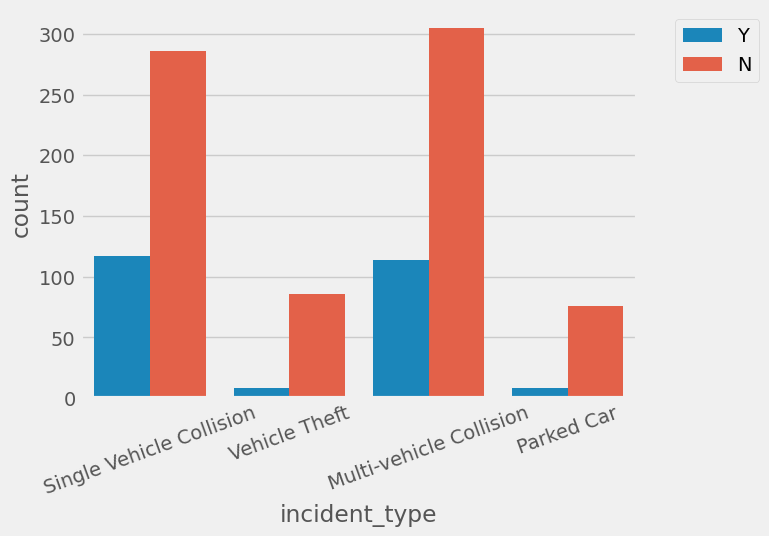

In [26]:
#lets see fraud_reported based on incident_type
sns.countplot( x = 'incident_type', hue = 'fraud_reported', data = df)
plt.legend( bbox_to_anchor = (1.05, 1), loc = 'upper left')
plt.xticks(rotation = 20)

plt.show()

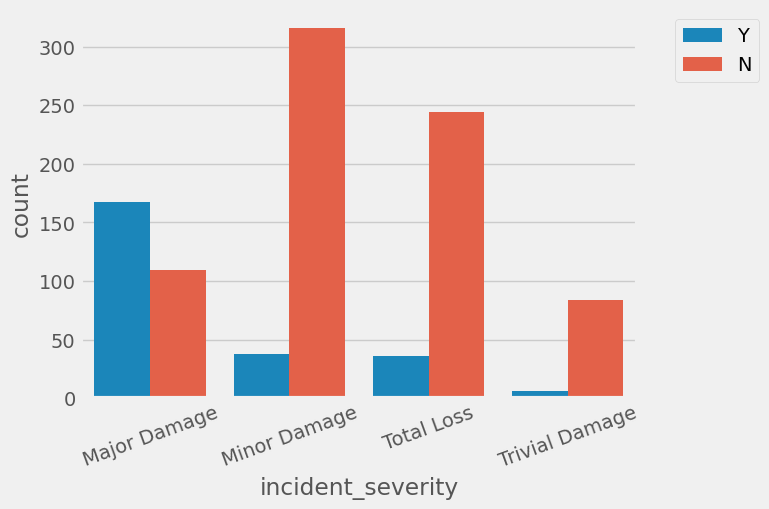

In [27]:
#lets check fraud_report based on incident_severity
sns.countplot(x = 'incident_severity', hue = 'fraud_reported', data = df)
plt.xticks(rotation = 20)
plt.legend( bbox_to_anchor = (1.05, 1), loc = 'upper left')
plt.show()

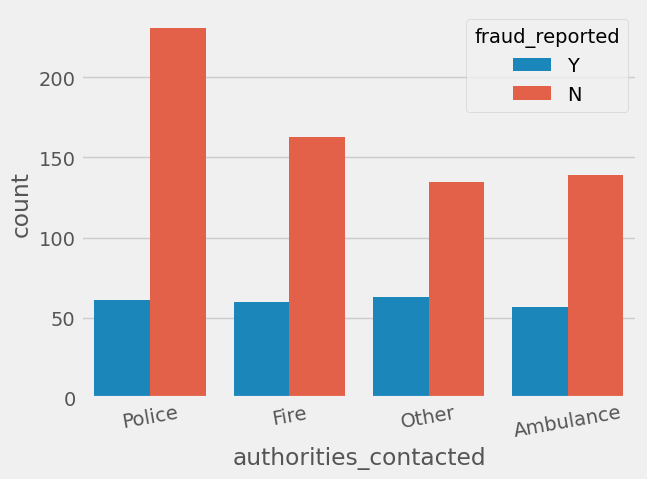

In [28]:
#lets check fraud_report based on authorities_contacted
sns.countplot(x = 'authorities_contacted', hue = 'fraud_reported', data = df)
plt.xticks(rotation = 10)
plt.show()

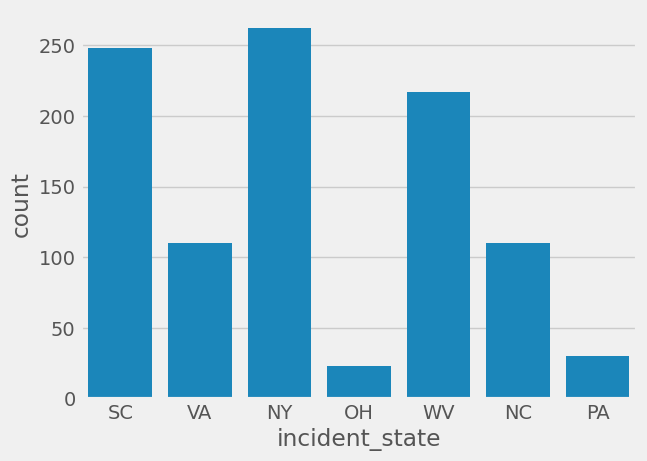

In [29]:
#lets check the counts for incident_state column
sns.countplot(x = 'incident_state',data = df)
plt.show()

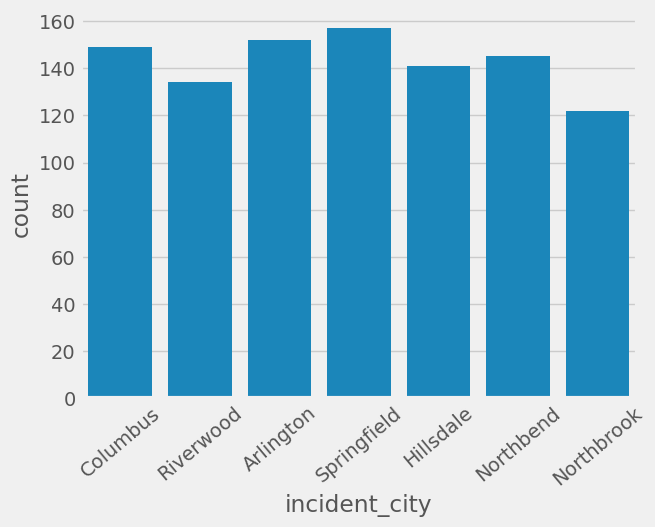

In [30]:
#lets check the counts for incident_state column
sns.countplot(x = 'incident_city',data = df)
plt.xticks(rotation = 40)
plt.show()

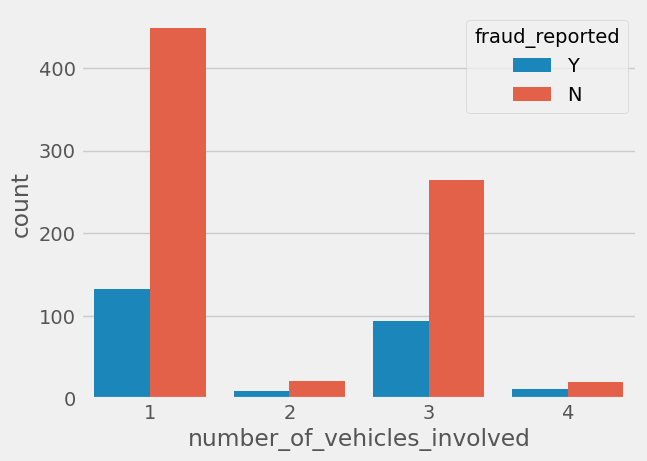

In [31]:
#lets check fraud_report based on number_of_vehicles_involved
sns.countplot(x = 'number_of_vehicles_involved', hue = 'fraud_reported', data = df)
plt.show()

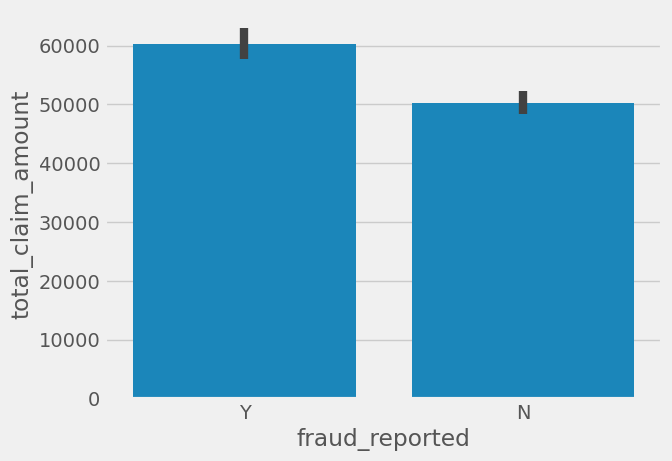

In [32]:
#lets check fraud_reported based on total_claim_amount
sns.barplot(x = 'fraud_reported', y = 'total_claim_amount', data = df)
plt.show()

In [33]:
#lets have a look on different claims
claim = pd.DataFrame(df, columns = ['total_claim_amount','injury_claim','property_claim','vehicle_claim'])
claim.head(10)

,total_claim_amount,injury_claim,property_claim,vehicle_claim
0,71610,6510,13020,52080
1,5070,780,780,3510
2,34650,7700,3850,23100
3,63400,6340,6340,50720
4,6500,1300,650,4550
5,64100,6410,6410,51280
6,78650,21450,7150,50050
7,51590,9380,9380,32830
8,27700,2770,2770,22160
9,42300,4700,4700,32900


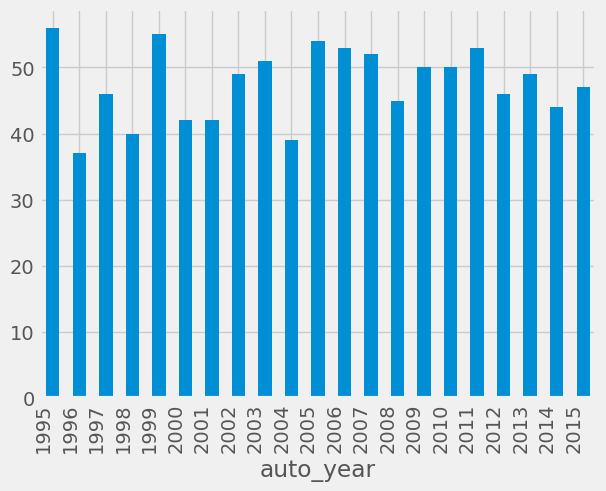

In [34]:
#lets plot countplot for auto_year column
ax = df.groupby('auto_year').vehicle_claim.count().plot.bar()
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.show()

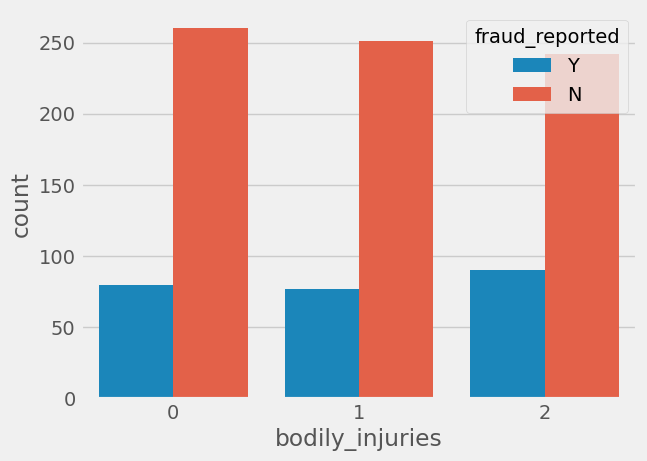

In [35]:
# lets check fraud report based on bodily_injuries
sns.countplot(x = 'bodily_injuries', hue = 'fraud_reported', data = df)
plt.show()

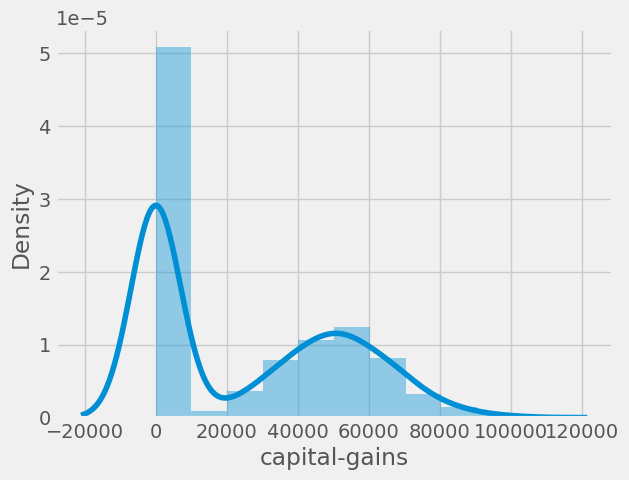

In [36]:
#lets have a look on capital gains
sns.distplot(df['capital-gains'])
plt.show()

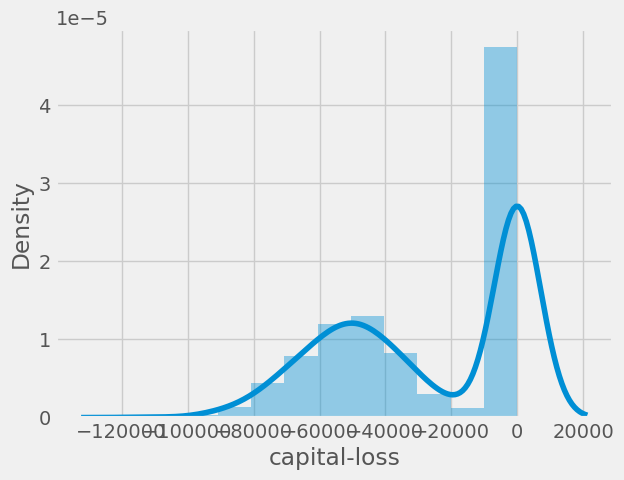

In [37]:
#lets see how capital loss is distributed
sns.distplot(df['capital-loss'])
plt.show()

In [38]:
#lets replace the categorical data in columns property_damage and police_report_available with suitable number
# I am replacing '?' with most frequent number of that column
df['property_damage'].replace('YES', 1, inplace=True)
df['property_damage'].replace('NO', 0, inplace=True)
df['property_damage'].replace('?', 0, inplace=True)
df['police_report_available'].replace('YES', 1, inplace=True)
df['police_report_available'].replace('NO',0, inplace=True)
df['police_report_available'].replace('?', 0, inplace=True)
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,1,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,0,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,0,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,0,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,0,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [39]:
#lets drop unwanted columns
df.drop(columns = ['policy_number','policy_bind_date'], inplace = True)

In [40]:
#As column '_c39' is having all null values, we will drop this column also
df.drop(columns = '_c39', inplace = True)

In [41]:
#lets replace label data with 0 & 1
df['fraud_reported'].replace('Y', 1, inplace = True)
df['fraud_reported'].replace('N', 0, inplace = True)

df.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,OH,250/500,1000,1406.91,0,466132,MALE,MD,...,2,1,71610,6510,13020,52080,Saab,92x,2004,1
1,228,42,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,...,0,0,5070,780,780,3510,Mercedes,E400,2007,1
2,134,29,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,...,3,0,34650,7700,3850,23100,Dodge,RAM,2007,0
3,256,41,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,...,2,0,63400,6340,6340,50720,Chevrolet,Tahoe,2014,1
4,228,44,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,...,1,0,6500,1300,650,4550,Accura,RSX,2009,0


In [42]:
#check count for insured_zip
df[['insured_zip']].value_counts()

insured_zip
456602         2
431202         2
446895         2
469429         2
477695         2
              ..
620737         1
620757         1
620819         1
620869         1
620962         1
Name: count, Length: 995, dtype: int64

In [43]:
#as insured_zip represents zip code we will make data type of column insured_zip as object
df[['insured_zip']] = df[['insured_zip']].astype(object)

In [44]:
#Lets use policy_csl and make two different columns
df['csl_per_person'] = df.policy_csl.str.split('/', expand=True)[0]
df['csl_per_accident'] = df.policy_csl.str.split('/', expand=True)[1]

In [45]:
#lets Derive the age of the vehicle based on the year value by assuming the data is collected in the year 2018
df['vehicle_age'] = 2018 - df['auto_year']

In [46]:
#lets check dataset after updating
df.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,csl_per_person,csl_per_accident,vehicle_age
0,328,48,OH,250/500,1000,1406.91,0,466132,MALE,MD,...,6510,13020,52080,Saab,92x,2004,1,250,500,14
1,228,42,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,...,780,780,3510,Mercedes,E400,2007,1,250,500,11
2,134,29,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,...,7700,3850,23100,Dodge,RAM,2007,0,100,300,11
3,256,41,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,...,6340,6340,50720,Chevrolet,Tahoe,2014,1,250,500,4
4,228,44,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,...,1300,650,4550,Accura,RSX,2009,0,500,1000,9


In [47]:
df.dtypes

months_as_customer               int64
age                              int64
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                     object
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day         int64
number_of_vehicles_involved      int64
property_damage          

In [48]:
#lets drop unwanted columns
df.drop(columns = ["policy_csl","auto_year","incident_date","insured_zip",], inplace = True)

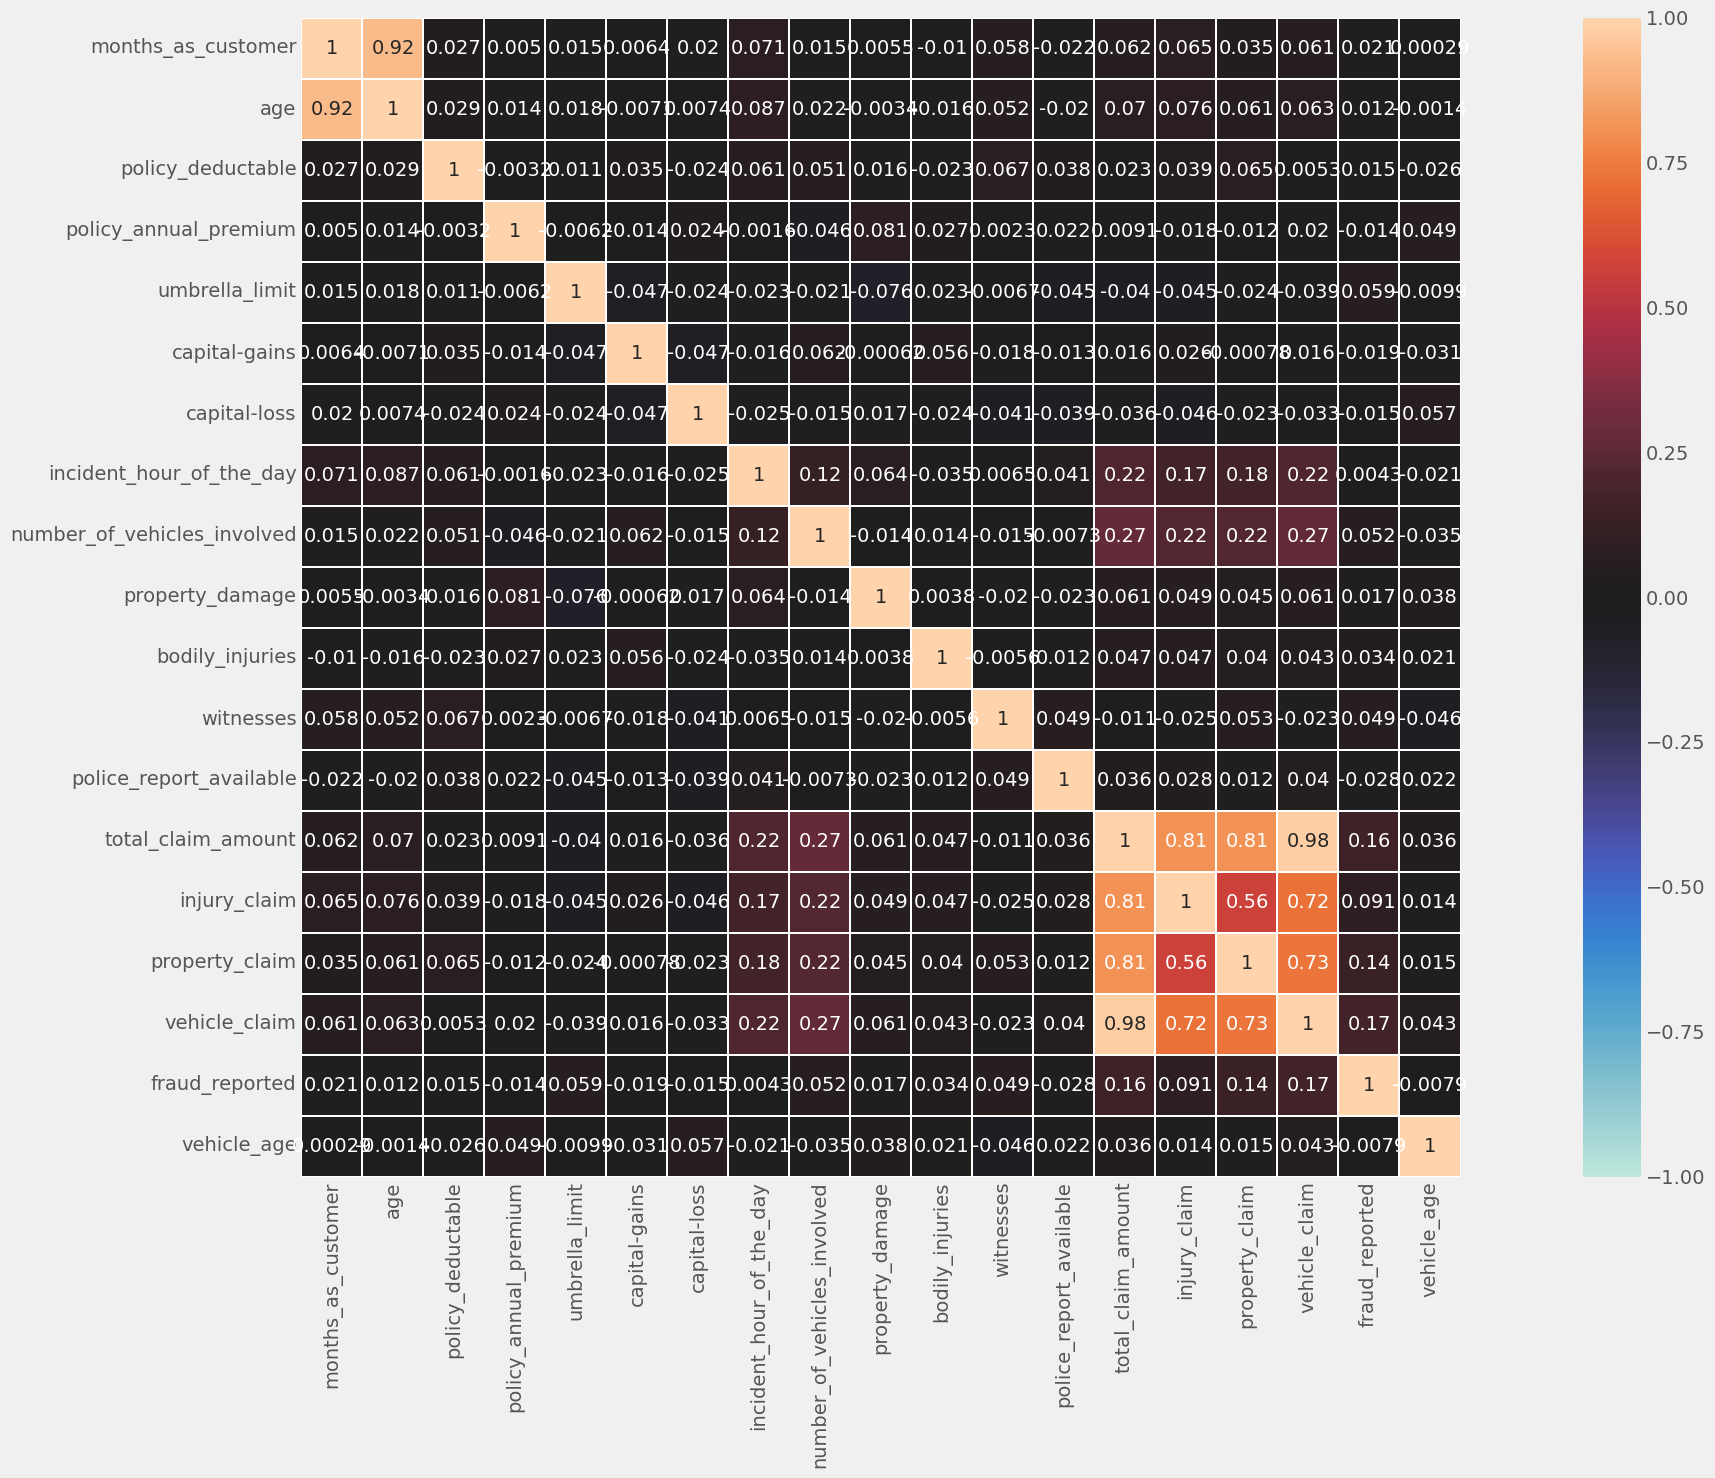

In [49]:
df_corr = df.select_dtypes(include=['number']).corr()

plt.figure(figsize=(25,15))
sns.heatmap(df_corr, vmin=-1, vmax=1, annot=True, square=True, center=0, fmt='.2g', linewidths=0.1)
plt.tight_layout()
plt.show()

In [50]:
#describe the data
df.describe()

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported,vehicle_age
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,1136.000000,1256.406150,1.101000e+06,25126.100000,-26793.700000,11.644000,1.83900,0.302000,0.992000,1.487000,0.314000,52761.94000,7433.420000,7399.570000,37928.950000,0.247000,12.897000
std,115.113174,9.140287,611.864673,244.167395,2.297407e+06,27872.187708,28104.096686,6.951373,1.01888,0.459355,0.820127,1.111335,0.464349,26401.53319,4880.951853,4824.726179,18886.252893,0.431483,6.015861
min,0.000000,19.000000,500.000000,433.330000,-1.000000e+06,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,0.000000,3.000000
25%,115.750000,32.000000,500.000000,1089.607500,0.000000e+00,0.000000,-51500.000000,6.000000,1.00000,0.000000,0.000000,1.000000,0.000000,41812.50000,4295.000000,4445.000000,30292.500000,0.000000,8.000000
50%,199.500000,38.000000,1000.000000,1257.200000,0.000000e+00,0.000000,-23250.000000,12.000000,1.00000,0.000000,1.000000,1.000000,0.000000,58055.00000,6775.000000,6750.000000,42100.000000,0.000000,13.000000
75%,276.250000,44.000000,2000.000000,1415.695000,0.000000e+00,51025.000000,0.000000,17.000000,3.00000,1.000000,2.000000,2.000000,1.000000,70592.50000,11305.000000,10885.000000,50822.500000,0.000000,18.000000
max,479.000000,64.000000,2000.000000,2047.590000,1.000000e+07,100500.000000,0.000000,23.000000,4.00000,1.000000,2.000000,3.000000,1.000000,114920.00000,21450.000000,23670.000000,79560.000000,1.000000,23.000000


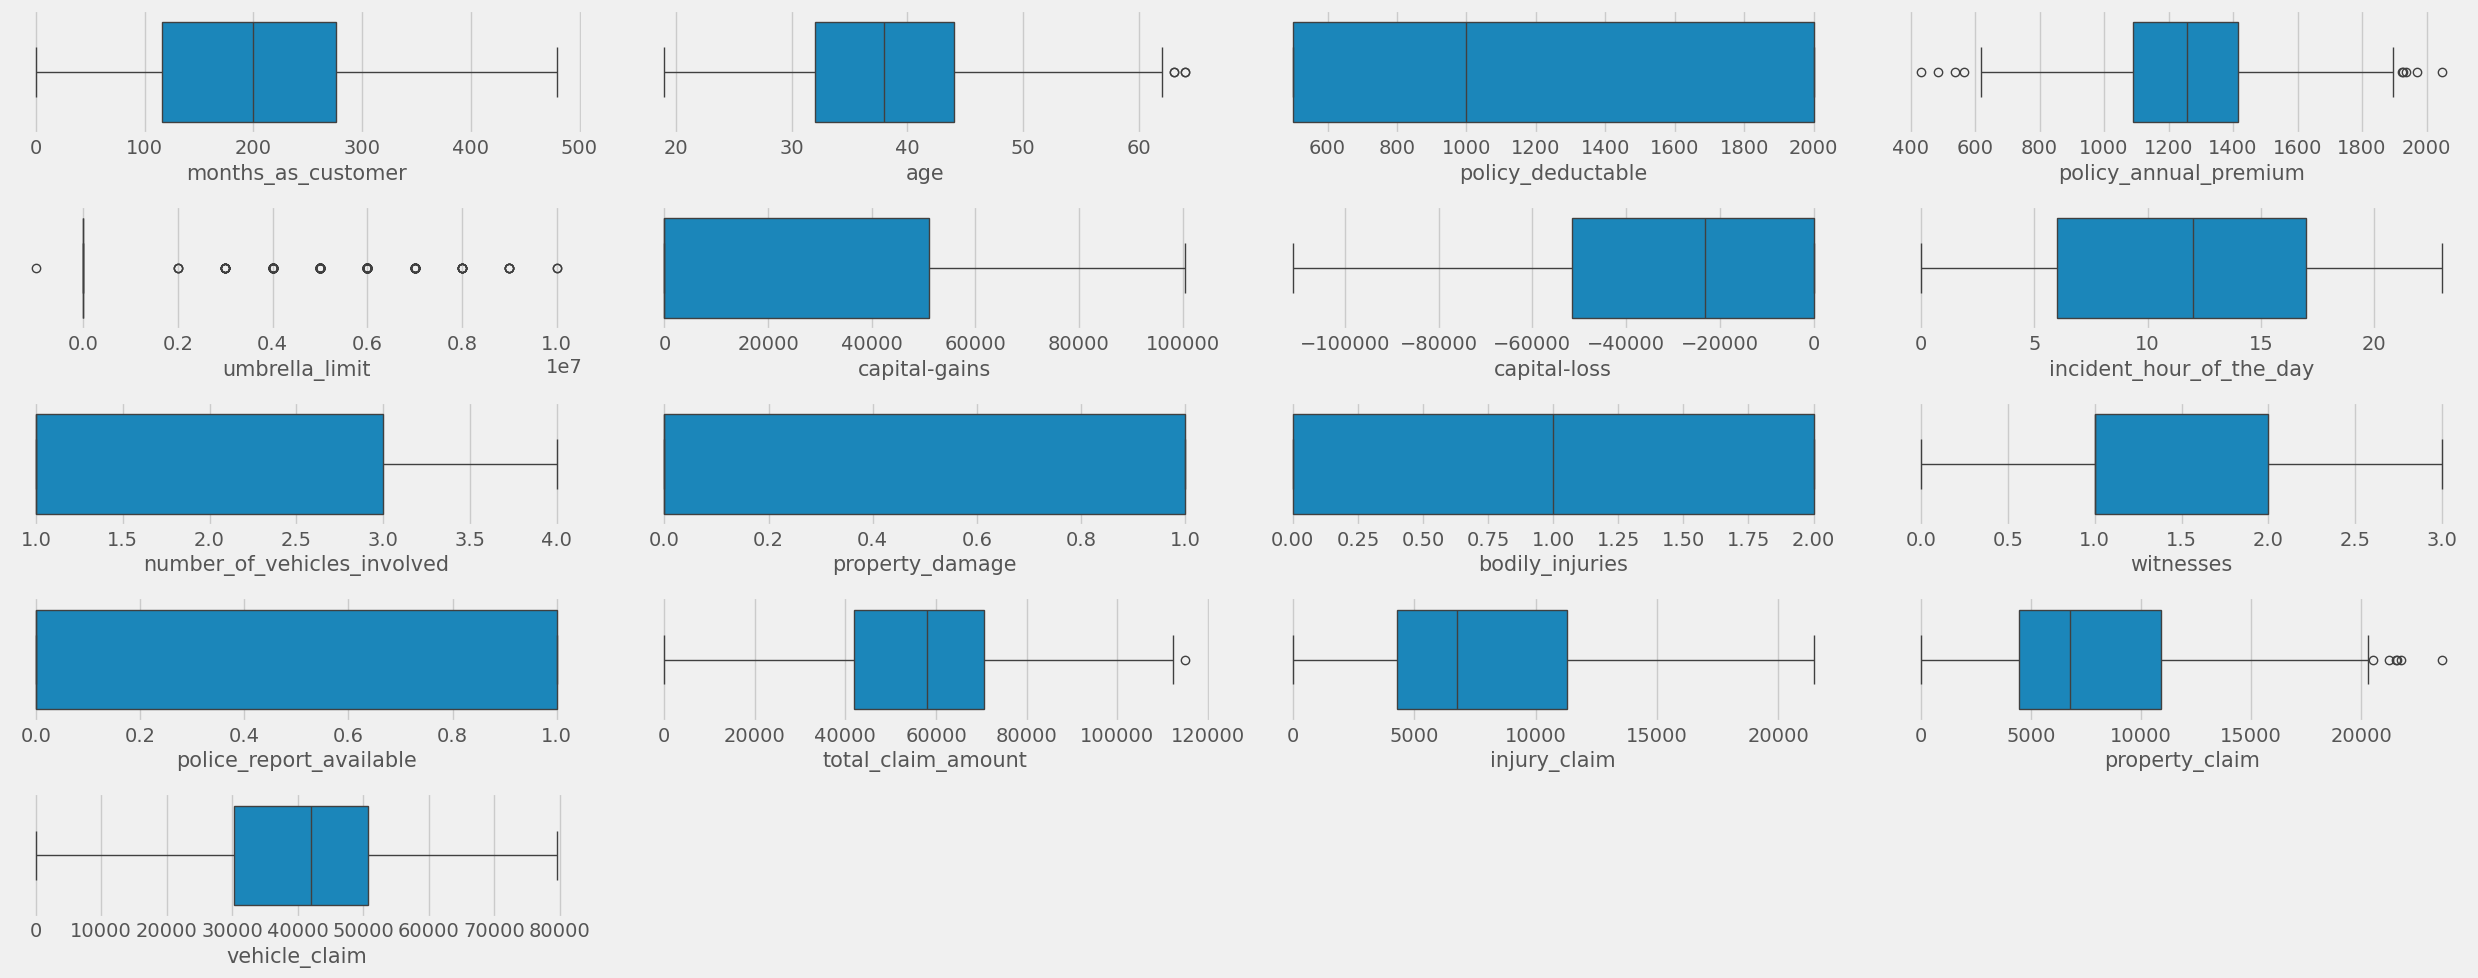

In [55]:
# Lets check outliers from continuous columns (horizontal boxplots)
num_data = df._get_numeric_data()
plt.figure(figsize=(25, 10))
plotnumber = 1

for column in num_data:
    if plotnumber <= 17:  # adjust based on number of numeric columns
        ax = plt.subplot(5, 4, plotnumber)
        sns.boxplot(x=num_data[column], ax=ax)  # horizontal boxplot
        ax.set_xlabel(column, fontsize=15)      # label only x-axis
        ax.set_ylabel("")                        # remove y-axis label
    plotnumber += 1

plt.tight_layout()
plt.show()


In [56]:
# Sorted skewness values
df_skew = df.select_dtypes(include=['number']).skew().sort_values(ascending=False)
print(df_skew)


umbrella_limit                 1.806712
fraud_reported                 1.175051
property_damage                0.863806
police_report_available        0.802728
number_of_vehicles_involved    0.502664
age                            0.478988
capital-gains                  0.478850
policy_deductable              0.477887
property_claim                 0.378169
months_as_customer             0.362177
injury_claim                   0.264811
vehicle_age                    0.048289
witnesses                      0.019636
bodily_injuries                0.014777
policy_annual_premium          0.004402
incident_hour_of_the_day      -0.035584
capital-loss                  -0.391472
total_claim_amount            -0.594582
vehicle_claim                 -0.621098
dtype: float64


In [57]:
#lets remove outliers using zscore method
from scipy import stats
from scipy.stats import zscore
z_score = zscore(df[["age","policy_annual_premium","umbrella_limit","total_claim_amount","property_claim"]])
abs_z_score = np.abs(z_score)
filtering_entry = (abs_z_score < 3).all(axis = 1)
df = df[filtering_entry]
df.reset_index(inplace = True)

In [58]:
df.shape

(981, 37)

In [59]:
#lets drop index column
df.drop(columns = 'index', inplace = True)

In [60]:
# Sorted skewness values
df_skew = df.select_dtypes(include=['number']).skew().sort_values(ascending=False)
print(df_skew)


umbrella_limit                 1.803065
fraud_reported                 1.189838
property_damage                0.854687
police_report_available        0.797825
number_of_vehicles_involved    0.506989
age                            0.475942
policy_deductable              0.473431
capital-gains                  0.465985
months_as_customer             0.363268
property_claim                 0.358919
injury_claim                   0.269442
vehicle_age                    0.054033
policy_annual_premium          0.034884
witnesses                      0.024567
bodily_injuries                0.001877
incident_hour_of_the_day      -0.038146
capital-loss                  -0.390468
total_claim_amount            -0.595242
vehicle_claim                 -0.622528
dtype: float64


In [61]:
# lets saperate label and features
x = df.drop(columns = 'fraud_reported')
y = df['fraud_reported']

In [62]:
#lets separate numerical and categorical features for scaling and encoding
num = x._get_numeric_data()
cat = x.select_dtypes(include=['object'])

In [63]:
#Lets treat the skewness from numerical columns
for index in num.skew().index:
    if num.skew().loc[index]>0.5:
        num[index]=np.cbrt(num[index])
    if num.skew().loc[index]<-0.5:
        num[index]=np.log1p(num[index])

In [64]:
num.skew()

months_as_customer             0.363268
age                            0.475942
policy_deductable              0.473431
policy_annual_premium          0.034884
umbrella_limit                 1.605531
capital-gains                  0.465985
capital-loss                  -0.390468
incident_hour_of_the_day      -0.038146
number_of_vehicles_involved    0.428659
property_damage                0.854687
bodily_injuries                0.001877
witnesses                      0.024567
police_report_available        0.797825
total_claim_amount            -1.667747
injury_claim                   0.269442
property_claim                 0.358919
vehicle_claim                 -1.676973
vehicle_age                    0.054033
dtype: float64

In [65]:
#Lets bring all numerical features to common scale by applying standard scaler
scaler = StandardScaler()
x_num = scaler.fit_transform(num)
x_num = pd.DataFrame(x_num,columns=num.columns)

In [66]:
#combine both numerical and categorical features
X = pd.concat([x_num,cat], axis = 1)

In [67]:
#lets check our features
X.head()

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,...,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,auto_make,auto_model,csl_per_person,csl_per_accident
0,1.070264,0.983956,-0.225968,0.619923,-0.479247,1.000306,0.954570,-0.958407,-0.831676,1.513918,...,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,Saab,92x,250,500
1,0.202991,0.329985,1.410009,-0.248937,2.035351,-0.906889,0.954570,-0.527848,-0.831676,-0.660538,...,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,Mercedes,E400,250,500
2,-0.612245,-1.086951,1.410009,0.645737,2.035351,0.349069,0.954570,-0.671368,1.171440,-0.660538,...,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,Dodge,RAM,100,300
3,0.445828,0.220990,1.410009,0.656510,2.192912,0.842864,-1.269796,-0.958407,-0.831676,-0.660538,...,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,Chevrolet,Tahoe,250,500
4,0.202991,0.547975,-0.225968,1.353331,2.192912,1.454740,-0.685187,1.194388,-0.831676,-0.660538,...,?,Minor Damage,NaN,NY,Arlington,3041 3rd Ave,Accura,RSX,500,1000


In [68]:
#lets convert categorical data into numeric values, using OrdinalEncoder
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
for i in X.columns:
    if X[i].dtypes == "object" :
        X[i] = enc.fit_transform(X[i].values.reshape(-1,1))

In [69]:
#lets have a look at data after encoding
X.head()

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,...,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,auto_make,auto_model,csl_per_person,csl_per_accident
0,1.070264,0.983956,-0.225968,0.619923,-0.479247,1.000306,0.954570,-0.958407,-0.831676,1.513918,...,3.0,0.0,3.0,4.0,1.0,977.0,10.0,1.0,1.0,2.0
1,0.202991,0.329985,1.410009,-0.248937,2.035351,-0.906889,0.954570,-0.527848,-0.831676,-0.660538,...,0.0,1.0,3.0,5.0,5.0,616.0,8.0,12.0,1.0,2.0
2,-0.612245,-1.086951,1.410009,0.645737,2.035351,0.349069,0.954570,-0.671368,1.171440,-0.660538,...,2.0,1.0,3.0,1.0,1.0,671.0,4.0,30.0,0.0,1.0
3,0.445828,0.220990,1.410009,0.656510,2.192912,0.842864,-1.269796,-0.958407,-0.831676,-0.660538,...,1.0,0.0,3.0,2.0,0.0,656.0,3.0,34.0,1.0,2.0
4,0.202991,0.547975,-0.225968,1.353331,2.192912,1.454740,-0.685187,1.194388,-0.831676,-0.660538,...,0.0,1.0,NaN,1.0,0.0,214.0,0.0,31.0,2.0,0.0


In [70]:
#check value count for target variable
y.value_counts()

fraud_reported
0    741
1    240
Name: count, dtype: int64

In [73]:
#lets do oversampling using SMOTE
import imblearn
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x_over,y_over = SM.fit_resample(X,y)

In [74]:
#lets check the target variable now
y_over.value_counts()

fraud_reported
1    741
0    741
Name: count, dtype: int64

In [75]:
#Lets find the best random state using LogisticRegression
from sklearn.linear_model import LogisticRegression
max_accu = 0
max_rs = 0
for i in range(1,1000):
    x_train,x_test,y_train,y_test = train_test_split(x_over,y_over,test_size = 0.25, random_state = i)
    LR = LogisticRegression()
    LR.fit(x_train,y_train)
    pred = LR.predict(x_test)
    acc = accuracy_score(y_test,pred)
    if acc > max_accu:
        max_accu = acc
        max_rs = i
print("Best accuracy is",max_accu,"on Random State",max_rs)

Best accuracy is 0.7924528301886793 on Random State 954


In [76]:
#lets split our data into train and test parts with best random_state
x_train,x_test,y_train,y_test = train_test_split(x_over, y_over, test_size = 0.25, random_state = 196 )

In [77]:
#Lets check the model with LogisticRegression
LR.fit(x_train,y_train)
predlr = LR.predict(x_test)
accuracy = accuracy_score(y_test,predlr)*100

print(f"Accuracy Score:", accuracy)
print(f"roc_auc_score: {roc_auc_score(y_test,predlr)*100}")
print("---------------------------------------------------")

#confusion matrix & classification report
print(f"Confusion Matrix : \n {confusion_matrix(y_test,predlr)}\n")
print(f"CLASSIFICATION REPORT : \n {classification_report(y_test,predlr)}")

#cross validation score
scores = cross_val_score(LR, x_over, y_over, cv = 10,scoring = "accuracy" ).mean()*100
print("\nCross validation score :", scores)

#result of accuracy minus cv score
result = accuracy - scores
print("\nAccuracy Score - Cross Validation Score :", result)

Accuracy Score: 75.47169811320755
roc_auc_score: 75.60773480662984
---------------------------------------------------
Confusion Matrix : 
 [[147  34]
 [ 57 133]]

CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

           0       0.72      0.81      0.76       181
           1       0.80      0.70      0.75       190

    accuracy                           0.75       371
   macro avg       0.76      0.76      0.75       371
weighted avg       0.76      0.75      0.75       371


Cross validation score : 73.21195356430256

Accuracy Score - Cross Validation Score : 2.2597445489049903


In [78]:
#model with DecesionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
pred_dt = dt.predict(x_test)
accuracy = accuracy_score(y_test,pred_dt)*100

print(f"Accuracy Score:", accuracy)
print(f"roc_auc_score: {roc_auc_score(y_test,pred_dt)*100}")
print("---------------------------------------------------")

#confusion matrix & classification report
print(f"Confusion Matrix : \n {confusion_matrix(y_test,pred_dt)}\n")
print(f"CLASSIFICATION REPORT : \n {classification_report(y_test,pred_dt)}")

#cross validation score
scores = cross_val_score(dt, x_over, y_over, cv = 10,scoring = "accuracy" ).mean()*100
print("\nCross validation score :", scores)

#result of accuracy minus cv score
result = accuracy - scores
print("\n\nAccuracy Score - Cross Validation Score :", result)

Accuracy Score: 84.36657681940702
roc_auc_score: 84.44896772317533
---------------------------------------------------
Confusion Matrix : 
 [[159  22]
 [ 36 154]]

CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

           0       0.82      0.88      0.85       181
           1       0.88      0.81      0.84       190

    accuracy                           0.84       371
   macro avg       0.85      0.84      0.84       371
weighted avg       0.85      0.84      0.84       371


Cross validation score : 83.68810085253038


Accuracy Score - Cross Validation Score : 0.6784759668766327


In [79]:
#model with RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
pred_rf = rf.predict(x_test)
accuracy = accuracy_score(y_test,pred_rf)*100

print(f"Accuracy Score:", accuracy)
print(f"\nroc_auc_score: {roc_auc_score(y_test,pred_rf)*100}")
print("---------------------------------------------------")

#confusion matrix & classification report
print(f"Confusion Matrix : \n {confusion_matrix(y_test,pred_rf)}\n")
print(f"CLASSIFICATION REPORT : \n {classification_report(y_test,pred_rf)}")

#cross validation score
scores = cross_val_score(rf, x_over, y_over, cv = 10,scoring = "accuracy" ).mean()*100
print("\nCross validation score :", scores)

#result of accuracy minus cv score
result = accuracy - scores
print("\n\nAccuracy Score - Cross Validation Score :", result)

Accuracy Score: 90.83557951482479

roc_auc_score: 90.93486478627509
---------------------------------------------------
Confusion Matrix : 
 [[172   9]
 [ 25 165]]

CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

           0       0.87      0.95      0.91       181
           1       0.95      0.87      0.91       190

    accuracy                           0.91       371
   macro avg       0.91      0.91      0.91       371
weighted avg       0.91      0.91      0.91       371


Cross validation score : 86.99664429530202


Accuracy Score - Cross Validation Score : 3.8389352195227673


In [80]:
#model with KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(x_train,y_train)
pred_kn = kn.predict(x_test)
accuracy = accuracy_score(y_test,pred_kn)*100

print(f"Accuracy Score:", accuracy)
print(f"roc_auc_score: {roc_auc_score(y_test,pred_kn)*100}")
print("---------------------------------------------------")

#confusion matrix & classification report
print(f"Confusion Matrix : \n {confusion_matrix(y_test,pred_kn)}\n")
print(f"CLASSIFICATION REPORT : \n {classification_report(y_test,pred_kn)}")

#cross validation score
scores = cross_val_score(kn, x_over, y_over, cv = 10,scoring = "accuracy" ).mean()*100
print("\nCross validation score :", scores)

#result of accuracy minus cv score
result = accuracy - scores
print("\n\nAccuracy Score - Cross Validation Score :", result)

Accuracy Score: 64.6900269541779
roc_auc_score: 64.11311427740623
---------------------------------------------------
Confusion Matrix : 
 [[ 73 108]
 [ 23 167]]

CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

           0       0.76      0.40      0.53       181
           1       0.61      0.88      0.72       190

    accuracy                           0.65       371
   macro avg       0.68      0.64      0.62       371
weighted avg       0.68      0.65      0.62       371


Cross validation score : 68.02058770179575


Accuracy Score - Cross Validation Score : -3.3305607476178523


In [81]:
# First, install the xgboost package
!pip install xgboost

# Now run your original code
from xgboost import XGBClassifier
xgb = XGBClassifier(verbosity = 0)
xgb.fit(x_train,y_train)
pred_xgb = xgb.predict(x_test)
accuracy = accuracy_score(y_test,pred_xgb)*100

print(f"Accuracy Score:", accuracy)
print(f"roc_auc_score: {roc_auc_score(y_test,pred_xgb)*100}")
print("---------------------------------------------------")

#confusion matrix & classification report
print(f"Confusion Matrix : \n {confusion_matrix(y_test,pred_xgb)}\n")
print(f"CLASSIFICATION REPORT : \n {classification_report(y_test,pred_xgb)}")

#cross validation score
scores = cross_val_score(xgb, x_over, y_over, cv = 10,scoring = "accuracy" ).mean()*100
print("\nCross validation score :", scores)

#result of accuracy minus cv score
result = accuracy - scores
print("\nAccuracy Score - Cross Validation Score :", result)

Accuracy Score: 89.4878706199461
roc_auc_score: 89.54056411747601
---------------------------------------------------
Confusion Matrix : 
 [[166  15]
 [ 24 166]]

CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

           0       0.87      0.92      0.89       181
           1       0.92      0.87      0.89       190

    accuracy                           0.89       371
   macro avg       0.90      0.90      0.89       371
weighted avg       0.90      0.89      0.89       371


Cross validation score : 88.14075820787231

Accuracy Score - Cross Validation Score : 1.347112412073784


In [82]:
#lets check with Extra Trees Classifier
from sklearn.ensemble import ExtraTreesClassifier
ext = ExtraTreesClassifier()
ext.fit(x_train,y_train)
pred_ext = xgb.predict(x_test)
accuracy = accuracy_score(y_test,pred_ext)*100

print(f"Accuracy Score:", accuracy)
print(f"roc_auc_score: {roc_auc_score(y_test,pred_ext)*100}")
print("---------------------------------------------------")

#confusion matrix & classification report
print(f"Confusion Matrix : \n {confusion_matrix(y_test,pred_ext)}\n")
print(f"CLASSIFICATION REPORT : \n {classification_report(y_test,pred_ext)}")

#cross validation score
scores = cross_val_score(ext, x_over, y_over, cv = 10,scoring = "accuracy" ).mean()*100
print("\nCross validation score :", scores)

#result of accuracy minus cv score
result = accuracy - scores
print("\nAccuracy Score - Cross Validation Score :", result)

Accuracy Score: 89.4878706199461
roc_auc_score: 89.54056411747601
---------------------------------------------------
Confusion Matrix : 
 [[166  15]
 [ 24 166]]

CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

           0       0.87      0.92      0.89       181
           1       0.92      0.87      0.89       190

    accuracy                           0.89       371
   macro avg       0.90      0.90      0.89       371
weighted avg       0.90      0.89      0.89       371


Cross validation score : 90.83575185924181

Accuracy Score - Cross Validation Score : -1.3478812392957167


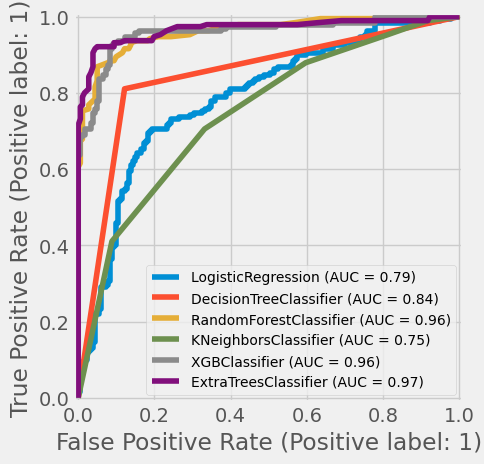

In [83]:
#Lets plot roc curve and check auc and performance of all algorithms
from sklearn.metrics import RocCurveDisplay

# Create ROC curve displays for each model
disp = RocCurveDisplay.from_estimator(LR, x_test, y_test)
RocCurveDisplay.from_estimator(dt, x_test, y_test, ax=disp.ax_)
RocCurveDisplay.from_estimator(rf, x_test, y_test, ax=disp.ax_)
RocCurveDisplay.from_estimator(kn, x_test, y_test, ax=disp.ax_)
RocCurveDisplay.from_estimator(xgb, x_test, y_test, ax=disp.ax_)
RocCurveDisplay.from_estimator(ext, x_test, y_test, ax=disp.ax_)

plt.legend(prop={"size": 10}, loc='lower right')
plt.show()

In [84]:
#lets selects different parameters for tuning
grid_params = {
               'criterion':['gini','entropy'],
                'max_depth': [10,12,15,20,22],
                'n_estimators':[500,700,1000,1200],
                'max_features':['aoto','sqrt','log2'],
                'min_samples_split': [2]
                }

In [85]:
#train the model with given parameters using GridSearchCV
GCV =  GridSearchCV(ExtraTreesClassifier(), grid_params, cv = 5)
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 12, 15, 20, 22],
                         'max_features': ['aoto', 'sqrt', 'log2'],
                         'min_samples_split': [2],
                         'n_estimators': [500, 700, 1000, 1200]})

In [86]:
GCV.best_params_       #printing the best parameters found by GridSearchCV

{'criterion': 'gini',
 'max_depth': 20,
 'max_features': 'sqrt',
 'min_samples_split': 2,
 'n_estimators': 1000}

In [87]:
#lets check the results of final model with best parameters
model = ExtraTreesClassifier(criterion = 'gini', max_depth = 20, max_features = 'sqrt', min_samples_split = 2, n_estimators = 700)
model.fit(x_train,y_train)
pred = model.predict(x_test)

print(f"Accuracy Score: {accuracy_score(y_test,pred)*100}%")
print("--------------------------------------------------------")

print(f"roc_auc_score: {roc_auc_score(y_test,pred)*100}%")
print("--------------------------------------------------------")

print(f"Confusion Matrix : \n {confusion_matrix(y_test,pred)}\n")
print("------------------------------------------------------------------------")
print(f"CLASSIFICATION REPORT : \n {classification_report(y_test,pred)}")

Accuracy Score: 92.99191374663073%
--------------------------------------------------------
roc_auc_score: 93.05321314335563%
--------------------------------------------------------
Confusion Matrix : 
 [[173   8]
 [ 18 172]]

------------------------------------------------------------------------
CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

           0       0.91      0.96      0.93       181
           1       0.96      0.91      0.93       190

    accuracy                           0.93       371
   macro avg       0.93      0.93      0.93       371
weighted avg       0.93      0.93      0.93       371



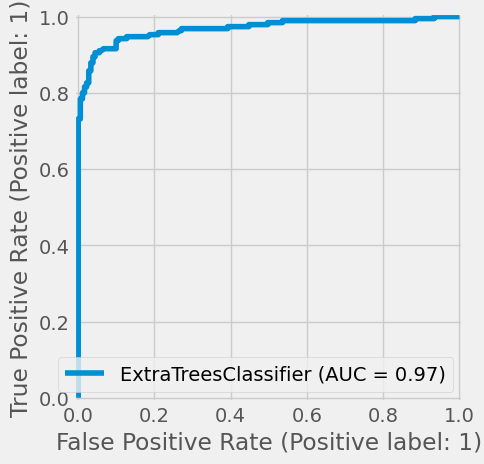

In [90]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(model, x_test, y_test)
plt.show()


In [93]:
import joblib

# Save the best model to a file
joblib.dump(model, 'extra_trees_best_model.pkl')

# To load it later
# loaded_model = joblib.load('extra_trees_best_model.pkl')


['extra_trees_best_model.pkl']